# The-Simpson-Episode-Analysis

Applying Big Data techniques using Simpsons' episodes per seasons database. Using some statistical hypothesis test, I show that the presence of a celebrity in a The SImpons's episode does not has positively impact in rating.

# Extract

To get the data, we will use a webscrapper. This saves us, in a sense, some work. For example, it is not necessary to *copy-paste* the 20 season tables.

In [ ]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np

## Episodes table

In [196]:
# Pass the data link to PANDAS for make the webscrapping of all tables. 
PATH_EPISODES = "https://en.wikipedia.org/wiki/List_of_The_Simpsons_episodes_(seasons_1%E2%80%9320)#Season_1_(1989%E2%80%9390)"
tbls_raw_episodes = pd.read_html(PATH_EPISODES)


In [197]:
len(tbls_raw_episodes)

23

In [198]:
for tbl_index in np.arange(0,23, 1):
    print(tbls_raw_episodes[tbl_index])

   Season Episodes               Originally aired                   \
   Season Episodes Episodes.1         First aired       Last aired   
0       1       13         13   December 17, 1989     May 13, 1990   
1       2       22         22    October 11, 1990    July 11, 1991   
2       3       24         24  September 19, 1991  August 27, 1992   
3       4       22         22  September 24, 1992     May 13, 1993   
4       5       22         22  September 30, 1993     May 19, 1994   
5       6       25         25   September 4, 1994     May 21, 1995   
6       7       25         25  September 17, 1995     May 19, 1996   
7       8       25         25    October 27, 1996     May 18, 1997   
8       9       25         25  September 21, 1997     May 17, 1998   
9      10       23         23     August 23, 1998     May 16, 1999   
10     11       22         22  September 26, 1999     May 21, 2000   
11     12       21         21    November 1, 2000     May 20, 2001   
12     13       22  

We are interested in only 20 of the 23 tables, scrapped that are the seasons of the series. The indices of these tables range from 1 to 21.

In [199]:
episodes = []
indexes_of_interest = np.arange(1,22, 1)
indexes_of_interest = np.delete(indexes_of_interest, 18)
for tbl_index in indexes_of_interest:
        episodes.append(tbls_raw_episodes[tbl_index])

and we see that the length of the list of seasons is, in effect, equal to 20.

In [200]:
len(episodes)

20

the concatenate all the tables.

In [201]:
episodes = pd.concat(episodes)

We take a look at the concatenated tables. We verify that we have 441 rows, *i.e* 441 episodes from the 20 seasons.

In [202]:
episodes

,No.overall,No. inseason,Title,Directed by,Written by,Original air date,Prod.code,U.S. viewers(millions)
0,1,1,"""Simpsons Roasting on an Open Fire""",David Silverman,Mimi Pond,"December 17, 1989",7G08,26.7[46]
1,2,2,"""Bart the Genius""",David Silverman,Jon Vitti,"January 14, 1990",7G02,24.5[46]
2,3,3,"""Homer's Odyssey""",Wes Archer,Jay Kogen & Wallace Wolodarsky,"January 21, 1990",7G03,27.5[47]
3,4,4,"""There's No Disgrace Like Home""",Gregg Vanzo & Kent Butterworth,Al Jean & Mike Reiss,"January 28, 1990",7G04,20.2[48]
4,5,5,"""Bart the General""",David Silverman,John Swartzwelder,"February 4, 1990",7G05,27.1[49]
...,...,...,...,...,...,...,...,...
16,437,17,"""The Good, the Sad and the Drugly""",Rob Oliver,Marc Wilmore,"April 19, 2009",LABF07,6.50[481]
17,438,18,"""Father Knows Worst""",Matthew Nastuk,Rob LaZebnik,"April 26, 2009",LABF08,5.94[482]
18,439,19,"""Waverly Hills, 9-0-2-1-D'oh""",Mike Frank Polcino,J. Stewart Burns,"May 3, 2009",LABF10,6.75[483]
19,440,20,"""Four Great Women and a Manicure""",Raymond S. Persi,Valentina L. Garza,"May 10, 2009",LABF09,5.16[484]


## Guests table

In [ ]:
# Scrapping the guests from 1 to 20 season.
PATH_GUESTS = "https://en.wikipedia.org/wiki/List_of_The_Simpsons_guest_stars_(seasons_1%E2%80%9320)"
tbls_raw_simpsons_guests = pd.read_html(PATH_GUESTS)

In [191]:
len(tbls_raw_simpsons_guests)

6

In [192]:
for tbl_index in np.arange(0,6, 1):
    print(tbls_raw_simpsons_guests[tbl_index])

                                                   0
0  Seasons: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 1...
    Season        Guest star                   Role(s)       No. Prod. code  \
0        1    Marcia Wallace  Edna Krabappel Ms. Melon   002–102       7G02   
1        1      Sam McMurray                    Worker   003–103       7G03   
2        1    Marcia Wallace            Edna Krabappel   003–103       7G03   
3        1      Miriam Flynn                  Ms. Barr   006–106       7G06   
4        1        Ron Taylor      Bleeding Gums Murphy   006–106       7G06   
..     ...               ...                       ...       ...        ...   
840     20    Marcia Wallace            Edna Krabappel  438–2018     LABF08   
841     20  Maurice LaMarche            City Inspector  439–2019     LABF10   
842     20    Elliot Page[Z]           Alaska Nebraska  439–2019     LABF10   
843     20    Marcia Wallace            Edna Krabappel  439–2019     LABF10   
844     20      Jodie Fos

En el caso de las tablas de guests, la que queremos es la que está indizada con 1.

In [189]:
tbl_guests_per_season = tbls_raw_simpsons_guests[1]
tbl_guests_per_season

,Season,Guest star,Role(s),No.,Prod. code,Episode title
0,1,Marcia Wallace,Edna Krabappel Ms. Melon,002–102,7G02,"""Bart the Genius"""
1,1,Sam McMurray,Worker,003–103,7G03,"""Homer's Odyssey""[35]"
2,1,Marcia Wallace,Edna Krabappel,003–103,7G03,"""Homer's Odyssey"""
3,1,Miriam Flynn,Ms. Barr,006–106,7G06,"""Moaning Lisa"""
4,1,Ron Taylor,Bleeding Gums Murphy,006–106,7G06,"""Moaning Lisa""[36]"
...,...,...,...,...,...,...
840,20,Marcia Wallace,Edna Krabappel,438–2018,LABF08,"""Father Knows Worst"""
841,20,Maurice LaMarche,City Inspector,439–2019,LABF10,"""Waverly Hills 9-0-2-1-D'oh""[397]"
842,20,Elliot Page[Z],Alaska Nebraska,439–2019,LABF10,"""Waverly Hills 9-0-2-1-D'oh""[397]"
843,20,Marcia Wallace,Edna Krabappel,439–2019,LABF10,"""Waverly Hills 9-0-2-1-D'oh"""


# Transform

## Episodes table.

We have to clean some columns of the table:
- Standardize the name of columns (names without space and each name in lowercase).
- Remove the quotes around the episode title
- Remove the brackets and numbers between them, in the million_viwiers column.
- Delete some columns.

In [203]:
# Define a dictionary with names.
DICT_CLEAN_NAMES_SEASONS_TABLE = {
    'No.overall': 'episode_num',
    'No. inseason': 'no_in_season',
    'Title': 'episode_title',
    'Prod.code' : 'prod_code',
    'U.S. viewers(millions)' : 'million_viewers'
}

In [204]:
# Here is the data processing.
episodes_raw = (
    episodes
        # Delete the duplicated column.
        .drop(columns=['Original air date', 'Written by', 'Directed by'])
        # Rename variables
        .rename(columns = DICT_CLEAN_NAMES_SEASONS_TABLE)
        # Drop quotes from episode title
        .assign(episode_title=lambda df_: df_.episode_title.str.replace('"', ''))
        # Drop numbers in brackets in million of views
        .assign(
                # Drop numbers in brackets in million of views
                million_viewers=lambda df_: df_.million_viewers.str.replace(r'(\[[^\]]*\])', "")
                )
)
episodes_raw

/tmp/ipykernel_20681/2169922469.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  million_viewers=lambda df_: df_.million_viewers.str.replace(r'(\[[^\]]*\])', "")


,episode_num,no_in_season,episode_title,prod_code,million_viewers
0,1,1,Simpsons Roasting on an Open Fire,7G08,26.7
1,2,2,Bart the Genius,7G02,24.5
2,3,3,Homer's Odyssey,7G03,27.5
3,4,4,There's No Disgrace Like Home,7G04,20.2
4,5,5,Bart the General,7G05,27.1
...,...,...,...,...,...
16,437,17,"The Good, the Sad and the Drugly",LABF07,6.50
17,438,18,Father Knows Worst,LABF08,5.94
18,439,19,"Waverly Hills, 9-0-2-1-D'oh",LABF10,6.75
19,440,20,Four Great Women and a Manicure,LABF09,5.16


Guardamos en local los datos para depués subirlos al datalake

In [89]:
# Save data
episodes_raw.to_csv("simpsons/raw/simpsons_episodes.csv", index=False)

## Guests table

In [193]:
# Define a dictionary with names
DICT_CLEAN_NAMES_GUESTS_TABLE = {
    'Season': 'season',
    'Guest star': 'guest_star',
    'Role(s)': 'roles',
    'No.': 'no',
    'Prod. code': 'prod_code',
    'Episode title': 'episode_title'
}

In [206]:
# Here goes the data processing
tbl_guests_per_seasons_raw = (
    tbl_guests_per_season
        # Rename variables
        .rename(columns = DICT_CLEAN_NAMES_GUESTS_TABLE)
        # Drop the number of episode in name's episode
        .assign(episode_title=lambda df_: df_.episode_title.str.replace(r'([[0-9]*])', "").str.replace('"', ''))
)
tbl_guests_per_seasons_raw

/tmp/ipykernel_20681/959501841.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  .assign(episode_title=lambda df_: df_.episode_title.str.replace(r'([[0-9]*])', "").str.replace('"', ''))


,season,guest_star,roles,no,prod_code,episode_title
0,1,Marcia Wallace,Edna Krabappel Ms. Melon,002–102,7G02,Bart the Genius
1,1,Sam McMurray,Worker,003–103,7G03,Homer's Odyssey
2,1,Marcia Wallace,Edna Krabappel,003–103,7G03,Homer's Odyssey
3,1,Miriam Flynn,Ms. Barr,006–106,7G06,Moaning Lisa
4,1,Ron Taylor,Bleeding Gums Murphy,006–106,7G06,Moaning Lisa
...,...,...,...,...,...,...
840,20,Marcia Wallace,Edna Krabappel,438–2018,LABF08,Father Knows Worst
841,20,Maurice LaMarche,City Inspector,439–2019,LABF10,Waverly Hills 9-0-2-1-D'oh
842,20,Elliot Page[Z],Alaska Nebraska,439–2019,LABF10,Waverly Hills 9-0-2-1-D'oh
843,20,Marcia Wallace,Edna Krabappel,439–2019,LABF10,Waverly Hills 9-0-2-1-D'oh


In [209]:
# Save data
tbl_guests_per_seasons_raw.to_csv("simpsons/raw/simpsons_seasons_guests.csv", index=False)

# Load

In [207]:
# Open a S3 client
import boto3
s3 = boto3.client('s3')

In [208]:
# Load to the actual bucket whos names is:
BUCKET_NAME = 'itam-analytics-david'

In [210]:
# Upload episodes table from 1 to 20 seasons in S3 
s3.upload_file(Filename="simpsons/raw/simpsons_episodes.csv", Bucket=BUCKET_NAME, Key="simpsons/raw/episodes/simpsons_episodes.csv")

In [225]:
# Upload guests table from 1 to 20 seasons in S3 
s3.upload_file(Filename="simpsons/raw/simpsons_seasons_guests.csv", Bucket=BUCKET_NAME, Key="simpsons/raw/guests2/simpsons_guests.csv")

# ELT

## a) Extract y b) Load

### Create tables in CSV database in data lake

In [142]:
import awswrangler as wr

* **Episodes table**

In [143]:
query = '''
    CREATE EXTERNAL TABLE IF NOT EXISTS `simpsons`.`episodes` (
    `episode_num` string,
    `no_in_season` string,
    `episode_title` string,
    `prod_code` string,
    `million_viewers` string
    ) COMMENT "Catalog of all episodes of Simpsons series."
    ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
    WITH SERDEPROPERTIES ('field.delim' = ',')
    STORED AS INPUTFORMAT 'org.apache.hadoop.mapred.TextInputFormat' OUTPUTFORMAT 'org.apache.hadoop.hive.ql.io.HiveIgnoreKeyTextOutputFormat'
    LOCATION 's3://itam-analytics-david/simpsons/raw/episodes/'
    TBLPROPERTIES ('classification' = 'csv', "skip.header.line.count"="1");
'''

Create table in AWS Glue Catalog

In [144]:
wr.athena.read_sql_query(query, database="simpsons", ctas_approach=False)

""


* **Guests table**

In [226]:
query = '''
    CREATE EXTERNAL TABLE IF NOT EXISTS `simpsons`.`guests2` (
    `season` string,
    `guest_star` string,
    `roles` string,
    `no` string,
    `prod_code` string,
    `episode_title` string
    ) COMMENT "Catalog of guests in Simpsons Seasons."
    ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
    WITH SERDEPROPERTIES ('field.delim' = ',')
    STORED AS INPUTFORMAT 'org.apache.hadoop.mapred.TextInputFormat' OUTPUTFORMAT 'org.apache.hadoop.hive.ql.io.HiveIgnoreKeyTextOutputFormat'
    LOCATION 's3://itam-analytics-david/simpsons/raw/guests2/'
    TBLPROPERTIES ('classification' = 'csv', "skip.header.line.count"="1");
'''

In [227]:
wr.athena.read_sql_query(query, database="simpsons", ctas_approach=False)

""


**An important observation is that the *Extract* step is in moving the data from the S3 datalake to a database in Athena**

## c) Transform

Here, we are going to execute a query in Athena to join, using the production code(`prod_code`) as key, the table of `episodes` with that of `guests2`.

In [275]:
query = '''
    CREATE TABLE simpsons.guests_per_episode AS (
        SELECT 
            a.episode_num,
            a.million_viewers,
            a.episode_title,
            b.guest_star
        FROM simpsons.episodes AS a
        LEFT JOIN simpsons.guests2 AS b
        ON a.prod_code = b.prod_code
    )
'''

In [276]:
wr.athena.read_sql_query(query, database="simpsons", ctas_approach=False)

""


## Analytics

We consume the previous table (`simpsons.guests_per_episode`) from Athena, to answer:

**Did having a special guest on an episode of The Simpsons, seasons 1-20, increase ratings (measured by millions of people watching each episode)?**

In [277]:
# query to get the entire table of guets_per_episodes
query = '''SELECT * FROM simpsons.guests_per_episode'''

In [278]:
# we load the table to Python as pdDataFrame
tbl_guests_per_episode = wr.athena.read_sql_query(query, database="simpsons", ctas_approach=False)

In [280]:
import pandas as pd

tbl_episodes_guests = (
    tbl_guests_per_episode
        # borrar registros con episodios duplicados
        .drop_duplicates(subset=['episode_title'])
        # columna que indica episodios que tuvieron invitados especiales o no
        .assign(guest_or_no=(~tbl_guests_per_episode['guest_star'].isna()).fillna(0).astype(int))
        # borrar columna con nombres de invitados especiales
        .drop(columns='guest_star')
        # convertir a numerica, la variable de millones de viewers
        .assign(million_viewers=pd.to_numeric(tbl_guests_per_episode['million_viewers'], errors='coerce'))
        .loc[lambda x: x['million_viewers'].notnull()]
        .assign(million_viewers=lambda df_: df_.million_viewers.astype('float'))
)


tbl_episodes_guests

,episode_num,million_viewers,episode_title,guest_or_no
0,1,26.70,Simpsons Roasting on an Open Fire,0
1,2,24.50,Bart the Genius,1
2,3,27.50,Homer's Odyssey,1
4,4,20.20,There's No Disgrace Like Home,0
5,5,27.10,Bart the General,0
...,...,...,...,...
848,435,6.58,Wedding for Disaster,1
849,436,6.50,Eeny Teeny Maya Moe,0
851,438,5.94,Father Knows Worst,1
854,440,5.16,Four Great Women and a Manicure,1


In [281]:
len(tbl_episodes_guests)

388

In [234]:
print(tbl_episodes_guests.dtypes)


episode_num         string
million_viewers    float64
episode_title       string
guest_or_no          int64
dtype: object


# Is there a difference in the episode ratings in seasons 1-20?

First we can graphically compare the population of episodes with and without guests

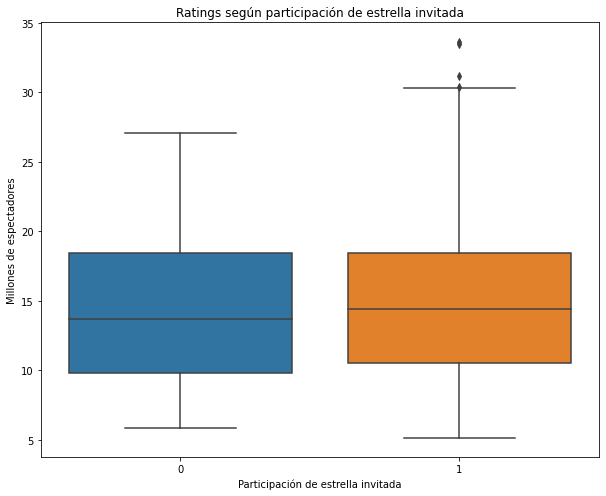

In [282]:
# Create a figure with customized size.
fig, ax = plt.subplots(figsize=(10, 8))

# Generate the boxplot
sns.boxplot(x='guest_or_no', y='million_viewers', data=tbl_episodes_guests, ax=ax)

# Add title and labels to axes
ax.set_title('Ratings según participación de estrella invitada')
ax.set_xlabel('Participación de estrella invitada')
ax.set_ylabel('Millones de espectadores')

plt.show()

We can also see the average ratings by set of episodes with guests or not:

In [283]:
rating_promedio_por_guest_or_no = tbl_episodes_guests.groupby('guest_or_no')['million_viewers'].mean()
rating_promedio_por_guest_or_no

guest_or_no
0    14.551970
1    14.995776
Name: million_viewers, dtype: float64

and the mean difference is positive, suggesting, a priori, that there is a beneficial effect on the rating when you have guests.

Someone naive could affirm, based on the previous graph or statistics, that there is an increase in the rating when there are guests. However, his answer would have little scientific support, since he would not be considering possible sample variation or difference in means/medians due to chance.

To answer the question we can do a mean difference test.

More precisely, if $X^{(0)}_1,\dots, X^{0}_M$ are the ratings of $M$ episodes that had no guests and $X^{(1)}_1,\dots, X^{1}_N$ are the ratings for $N$ episodes that had guests, we want to test
$$
H_0: \delta := \mu^{(1)}-\mu^{(0)}= 0 \qquad H_1: \delta> 0
$$

If each population is normally distributed, then we can apply a Student's $t$ test. Let's see the qq plot of each population

In [284]:
with_guests = tbl_episodes_guests.loc[tbl_episodes_guests['guest_or_no'] == 1]
no_guests = tbl_episodes_guests.loc[tbl_episodes_guests['guest_or_no'] == 0]

**Visualizing qq-plot of ratings of episodes with guests**

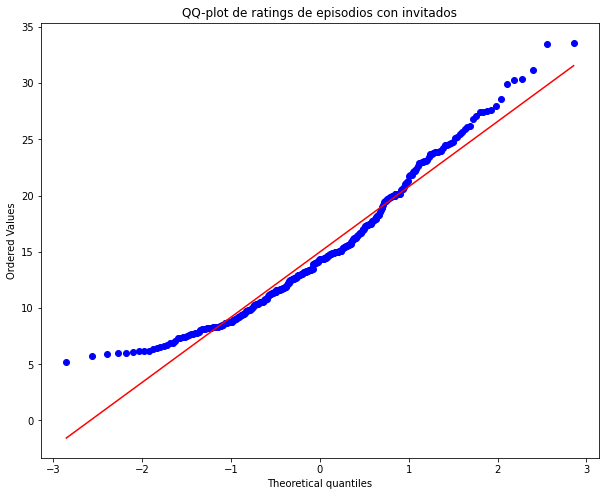

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
# Graficar el qqplot y añadir un título
fig, ax = plt.subplots(figsize=(10, 8))
stats.probplot(with_guests['million_viewers'], dist="norm", plot=ax)
ax.set_title("QQ-plot of guest episode ratings")
plt.show()

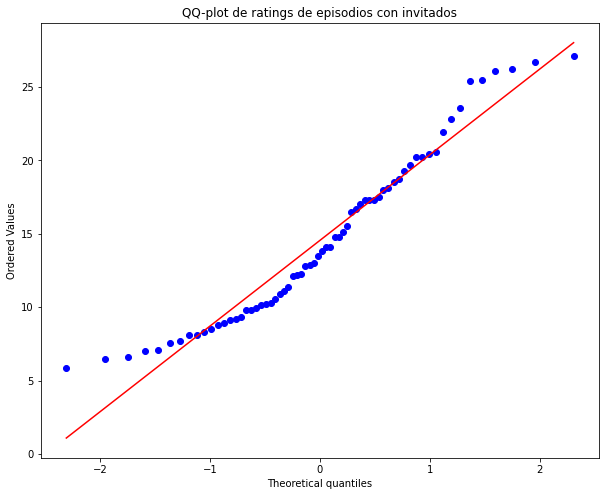

In [286]:
# Graficar el qqplot y añadir un título
fig, ax = plt.subplots(figsize=(10, 8))
stats.probplot(no_guests['million_viewers'], dist="norm", plot=ax)
ax.set_title("QQ-plot de ratings de episodios con invitados")
plt.show()

# Answer


The ratings for episodes with and without guests are clearly not approximately normal.
Both populations should be approximately normal if an answer is to be given by a $t$ test.

However, we can apply a permutation test, which does not assume a parametric form of the data (see **Chihara, L. M., & Hesterberg, T. C. (2018). "Permutation tests". In Mathematical Statistics with Resampling and R (2nd ed. , pp. 147-173). Springer.**)

In [287]:
# calcular la diferencia entre las medias observadas
obs_diff = rating_promedio_por_guest_or_no[1] - rating_promedio_por_guest_or_no[0]

# combinar las dos muestras en una sola
combined_samples = np.concatenate([with_guests['million_viewers'], no_guests['million_viewers']])

# número de permutaciones a realizar
n_permutations = 1000

# lista para almacenar las diferencias de medias permutadas
perm_diffs = []

# realizar permutaciones
for i in range(n_permutations):
    # permutar lo indices
    indices = np.random.permutation(len(combined_samples))

    # Muestra aleatoria de tamaño len
    perm_sample1 = np.take(combined_samples, indices[:len(with_guests['million_viewers'])])

    # Seleccionar los elementos de las muestras restantes
    perm_sample2 = np.take(combined_samples, indices[len(with_guests['million_viewers']):])
    
    # calcular la diferencia entre las medias permutadas
    perm_diff = np.mean(perm_sample2) - np.mean(perm_sample1)
    
    # almacenar la diferencia de medias permutadas
    perm_diffs.append(perm_diff)

# calcular el valor p como la proporción de permutaciones que tienen una diferencia de medias mayor o igual que la observada
p_value = np.sum(np.abs(perm_diffs) >= np.abs(obs_diff)) / n_permutations

# imprimir el resultado
print("p-value:", p_value)

p-value: 0.566


Given that the value $p$ (probability of observing a difference as or more extreme than the one observed under $H_0$) is greater than a level of significance $\alpha=0.05$, we **NOT** reject $H_0$, which which means there is evidence of zero effect on the rating when there are guests

Similarly, ignoring the normality assumption, if $t$ is tested, the conclusion is the same.

In [288]:
# prueba t de dos muestras
t_stat, p_value = stats.ttest_ind(with_guests['million_viewers'], no_guests['million_viewers'])

# imprimir el resultado
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 0.5583940782424397
p-value: 0.5768990663558299
